In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Thyroid_Diff.csv')
df.head()

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
0,27,F,No,No,No,Euthyroid,Single nodular goiter-left,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Indeterminate,No
1,34,F,No,Yes,No,Euthyroid,Multinodular goiter,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
2,30,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
3,62,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
4,62,F,No,No,No,Euthyroid,Multinodular goiter,No,Micropapillary,Multi-Focal,Low,T1a,N0,M0,I,Excellent,No


Columns: Index(['Age', 'Gender', 'Smoking', 'Hx Smoking', 'Hx Radiothreapy',
       'Thyroid Function', 'Physical Examination', 'Adenopathy', 'Pathology',
       'Focality', 'Risk', 'T', 'N', 'M', 'Stage', 'Response', 'Recurred'],
      dtype='object')


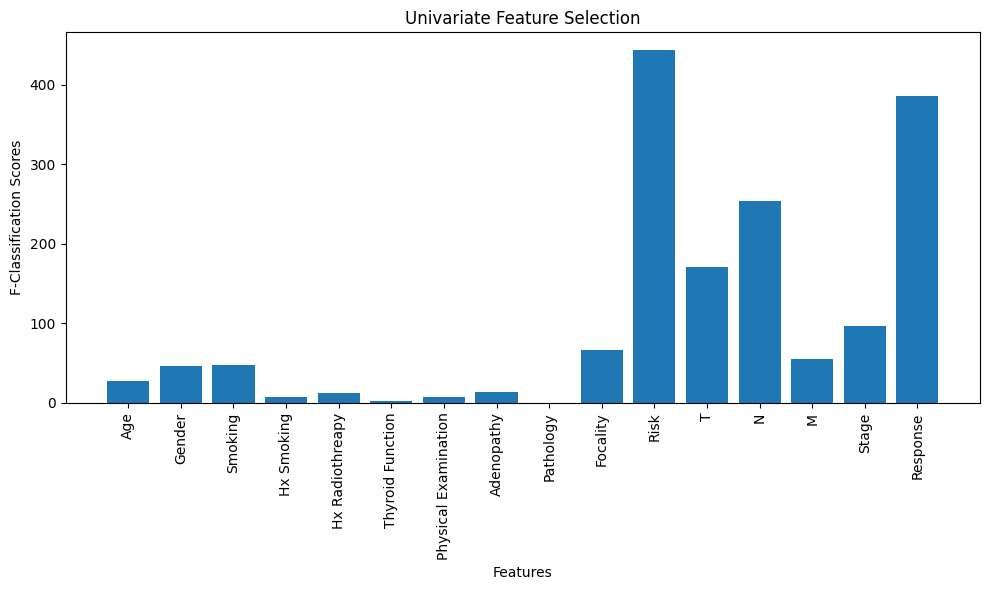

Selected Features (k=6):
Index(['Focality', 'Risk', 'T', 'N', 'Stage', 'Response'], dtype='object')


In [ ]:
#univariate feature selection
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.feature_selection import SelectKBest, f_regression, f_classif
from sklearn.preprocessing import LabelEncoder

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Thyroid_Diff.csv')

print("Columns:", df.columns)
target_column = 'Recurred'

df.replace(['?', 'NA', 'N/A', 'null', '--'], np.nan, inplace=True)
df.dropna(inplace=True)

X = df.drop(columns=[target_column])
y = df[target_column]

for col in X.columns:
    if X[col].dtype == 'object':
        try:
            X[col] = LabelEncoder().fit_transform(X[col])
        except:
            print(f"Could not encode column: {col}")

X = X.apply(pd.to_numeric, errors='coerce')
X = X.dropna(axis=1)

y = y.astype(str)
y = LabelEncoder().fit_transform(y)

selector = SelectKBest(score_func=f_classif, k='all') # Changed score_func and k
X_new = selector.fit_transform(X, y)

selected_indices = selector.get_support(indices=True)

scores = selector.scores_

plt.figure(figsize=(10, 6))

plt.bar(range(len(X.columns)), scores, tick_label=X.columns)
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('F-Classification Scores')
plt.title("Univariate Feature Selection")
plt.tight_layout()
plt.show()

selector_final = SelectKBest(score_func=f_classif, k=6)
selector_final.fit(X, y)
selected_indices_final = selector_final.get_support(indices=True)
selected_features = X.columns[selected_indices_final]


print("Selected Features (k=6):")
print(selected_features)

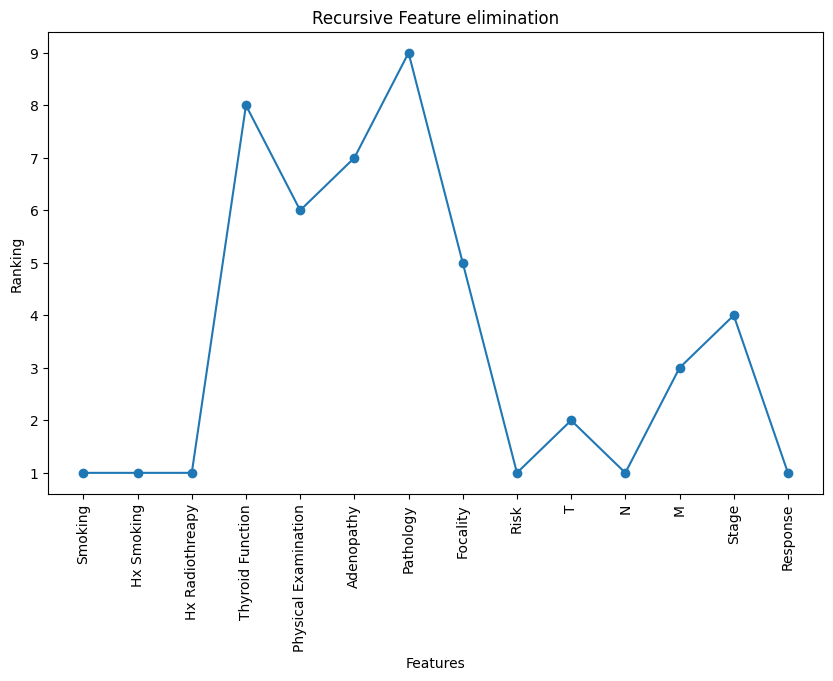

Selected Features:
Index(['Smoking', 'Hx Smoking', 'Hx Radiothreapy', 'Risk', 'N', 'Response'], dtype='object')


In [ ]:
#Recursive feature elimination

import matplotlib.pyplot as plt
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

df.drop(columns=["Gender","Age"], axis=1,inplace=True)

target_column='Recurred'

df.replace(['?','NA','N/A','null','--'],np.nan,inplace=True)
df.dropna(inplace=True)

X = df.drop(columns=[target_column])
y = df[target_column]

for col in X.columns:
    if X[col].dtype == 'object':
        try:
            X[col] = LabelEncoder().fit_transform(X[col])
        except:
            print(f"Could not encode column: {col}")

X = X.apply(pd.to_numeric, errors='coerce')
X = X.dropna(axis=1)

y = y.astype(str)
y = LabelEncoder().fit_transform(y)

estimator=LinearRegression()
selector=RFE(estimator,n_features_to_select=6)
X_new=selector.fit_transform(X,y)

selected_indices=selector.get_support(indices=True)
selected_features=X.columns[selected_indices]

rankings=selector.ranking_

plt.figure(figsize=(10,6))
plt.plot(range(1, len(rankings) + 1), rankings, marker='o')
plt.xticks(range(1, len(rankings) + 1), X.columns, rotation=90)
plt.xlabel('Features')
plt.ylabel('Ranking')
plt.title('Recursive Feature elimination')
plt.show()

print("Selected Features:")
print(selected_features)


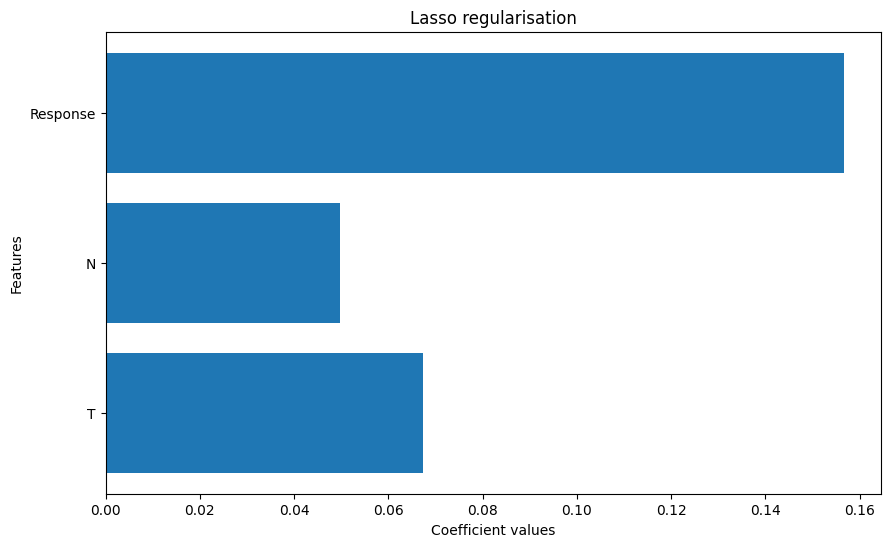

Selected features:
Index(['T', 'N', 'Response'], dtype='object')


In [ ]:
#L1 regularisation(Lasso)
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import Lasso

target_column='Recurred'

df.replace(['?', 'NA', 'N/A', 'null', '--'], np.nan, inplace=True)
df.dropna(inplace=True)

X=df.drop(columns=[target_column])
y=df[target_column]

for col in X.columns:
  if X[col].dtype =='object':
     try:
        X[col]=LabelEncoder().fit_transform(X[col])
     except:
        print(f"could not encode column: {col}")

X = X.apply(pd.to_numeric, errors='coerce')
X = X.dropna(axis=1)

y = y.astype(str)
y = LabelEncoder().fit_transform(y)

lasso=Lasso(alpha=0.1)
lasso.fit(X,y)

nonzero_coefs = lasso.coef_
selected_indices = nonzero_coefs != 0
selected_features = X.columns[selected_indices]
nonzero_coefs = nonzero_coefs[selected_indices]

plt.figure(figsize=(10,6))
plt.barh(range(len(nonzero_coefs)), nonzero_coefs, tick_label=selected_features)
plt.xlabel('Coefficient values')
plt.ylabel('Features')
plt.title('Lasso regularisation')
plt.show()

print("Selected features:")
print(selected_features)

Columns: Index(['Smoking', 'Hx Smoking', 'Hx Radiothreapy', 'Thyroid Function',
       'Physical Examination', 'Adenopathy', 'Pathology', 'Focality', 'Risk',
       'T', 'N', 'M', 'Stage', 'Response', 'Recurred'],
      dtype='object')


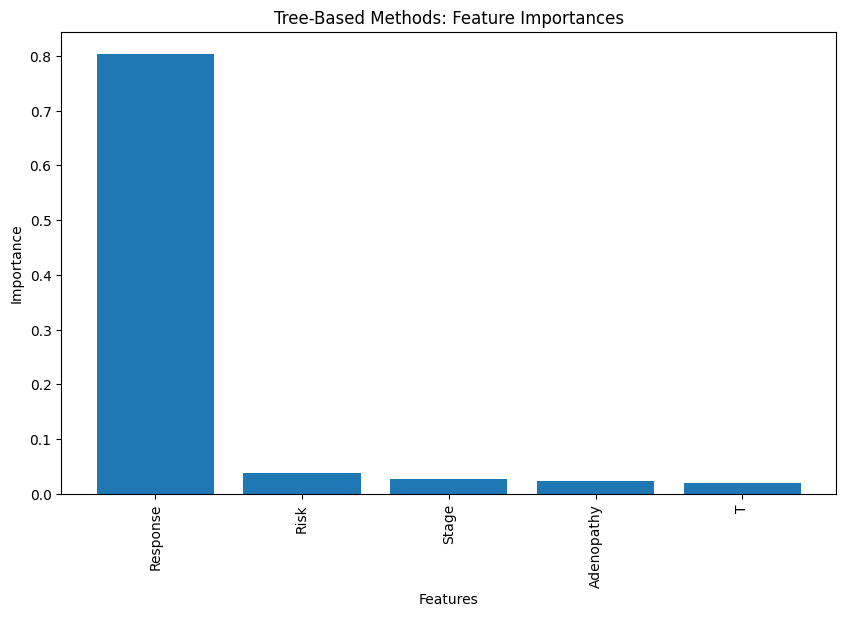

Selected Features:
Index(['Response', 'Risk', 'Stage', 'Adenopathy', 'T'], dtype='object')


In [ ]:
#tree based methods
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.feature_selection import SelectKBest, f_regression, f_classif
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Thyroid_Diff.csv')

df.drop(columns=['Gender','Age'], axis=1, inplace=True)

print("Columns:", df.columns)
target_column = 'Recurred'

df.replace(['?', 'NA', 'N/A', 'null', '--'], np.nan, inplace=True)
df.dropna(inplace=True)

X = df.drop(columns=[target_column])
y = df[target_column]

for col in X.columns:
    if X[col].dtype == 'object':
        try:
            X[col] = LabelEncoder().fit_transform(X[col])
        except:
            print(f"Could not encode column: {col}")

X = X.apply(pd.to_numeric, errors='coerce')
X = X.dropna(axis=1)

y = y.astype(str)
y = LabelEncoder().fit_transform(y)

forest=RandomForestRegressor(n_estimators=100)
forest.fit(X,y)

importances = forest.feature_importances_
sorted_indices = importances.argsort()[::-1]

k=5
selected_features=X.columns[sorted_indices[:k]]
top_importances=importances[sorted_indices[:k]]
plt.figure(figsize=(10, 6))
plt.bar(range(len(top_importances)), top_importances, tick_label=selected_features)
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Tree-Based Methods: Feature Importances')
plt.show()

print("Selected Features:")
print(selected_features)




Columns: Index(['Smoking', 'Hx Smoking', 'Hx Radiothreapy', 'Thyroid Function',
       'Physical Examination', 'Adenopathy', 'Pathology', 'Focality', 'Risk',
       'T', 'N', 'M', 'Stage', 'Response', 'Recurred'],
      dtype='object')


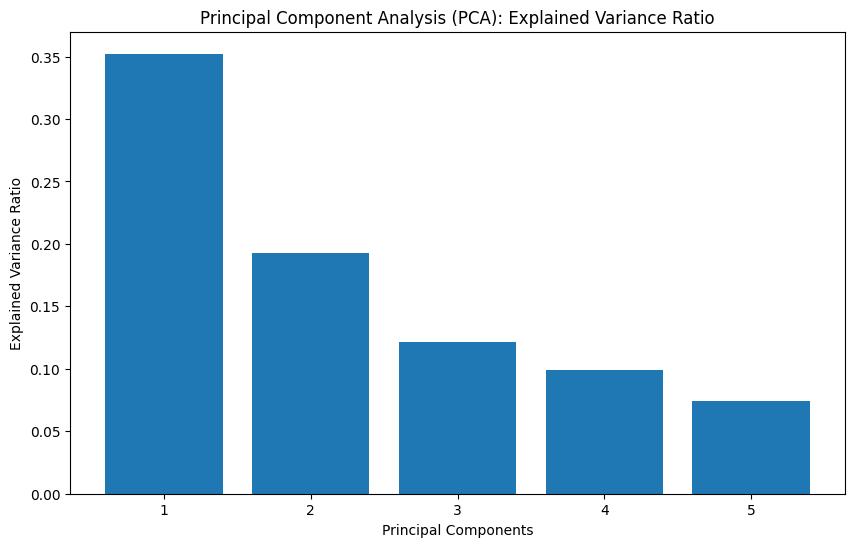

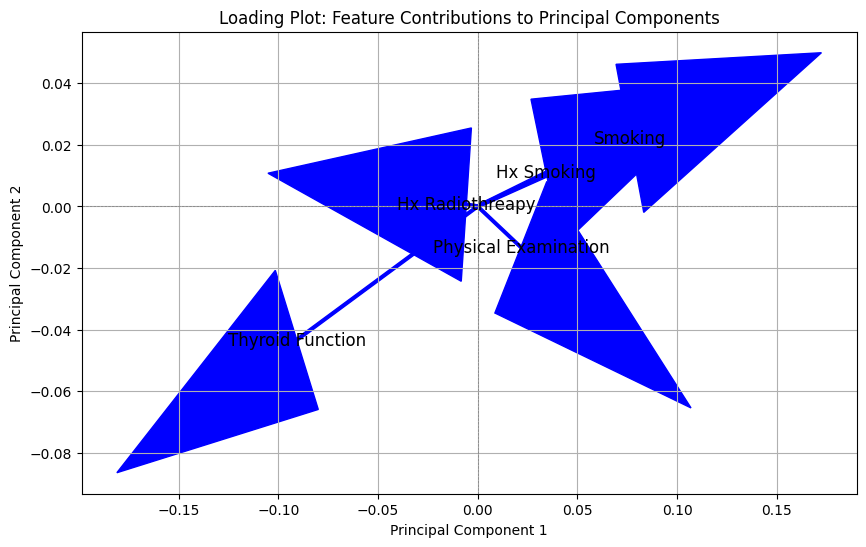

In [ ]:
#PCA
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, f_regression, f_classif
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Thyroid_Diff.csv')

df.drop(columns=['Gender','Age'], axis=1, inplace=True)

print("Columns:", df.columns)
target_column = 'Recurred'

df.replace(['?', 'NA', 'N/A', 'null', '--'], np.nan, inplace=True)
df.dropna(inplace=True)

X = df.drop(columns=[target_column])
y = df[target_column]

for col in X.columns:
    if X[col].dtype == 'object':
        try:
            X[col] = LabelEncoder().fit_transform(X[col])
        except:
            print(f"Could not encode column: {col}")

X = X.apply(pd.to_numeric, errors='coerce')
X = X.dropna(axis=1)

y = y.astype(str)
y = LabelEncoder().fit_transform(y)
pca = PCA(n_components=5)
X_new = pca.fit_transform(X)

# Get the explained variance ratio
explained_variance = pca.explained_variance_ratio_

# Plot the explained variance ratio
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(explained_variance) + 1), explained_variance)
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Principal Component Analysis (PCA): Explained Variance Ratio')
plt.show()

# Get the loadings (principal component vectors)
loadings = pca.components_

# Create a loading plot
plt.figure(figsize=(10, 6))
for i, (loading, feature_name) in enumerate(zip(loadings, X.columns)):
    plt.arrow(0, 0, loading[0], loading[1], head_width=0.05, head_length=0.1, fc='blue', ec='blue')
    plt.text(loading[0], loading[1], feature_name, fontsize=12, ha='center', va='center', color='black')
plt.axhline(y=0, color='gray', linestyle='--', linewidth=0.5)
plt.axvline(x=0, color='gray', linestyle='--', linewidth=0.5)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Loading Plot: Feature Contributions to Principal Components')
plt.grid(True)
plt.show()


In [ ]:
#correlation based
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.feature_selection import SelectKBest, f_regression, f_classif
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Thyroid_Diff.csv')

df.drop(columns=['Gender','Age'], axis=1, inplace=True)

print("Columns:", df.columns)
target_column = 'Recurred'

df.replace(['?', 'NA', 'N/A', 'null', '--'], np.nan, inplace=True)
df.dropna(inplace=True)

X = df.drop(columns=[target_column])
y = df[target_column]

for col in X.columns:
    if X[col].dtype == 'object':
        try:
            X[col] = LabelEncoder().fit_transform(X[col])
        except:
            print(f"Could not encode column: {col}")

X = X.apply(pd.to_numeric, errors='coerce')
X = X.dropna(axis=1)

y = y.astype(str)
y = LabelEncoder().fit_transform(y)
correlations = np.abs(np.corrcoef(X.T, y)[:X.shape[1], -1])
sorted_indices = correlations.argsort()[::-1]

# Select the top k features
k = 5
selected_features = X.columns[sorted_indices[:k]]
top_correlations = correlations[sorted_indices[:k]]

print("Selected Features with correlation:")
print(selected_features)
print(top_correlations)


Columns: Index(['Smoking', 'Hx Smoking', 'Hx Radiothreapy', 'Thyroid Function',
       'Physical Examination', 'Adenopathy', 'Pathology', 'Focality', 'Risk',
       'T', 'N', 'M', 'Stage', 'Response', 'Recurred'],
      dtype='object')
Selected Features with correlation:
Index(['Risk', 'Response', 'N', 'T', 'Stage'], dtype='object')
[0.73337587 0.70895661 0.63232348 0.55620108 0.44913731]


COlumns: Index(['Smoking', 'Hx Smoking', 'Hx Radiothreapy', 'Thyroid Function',
       'Physical Examination', 'Adenopathy', 'Pathology', 'Focality', 'Risk',
       'T', 'N', 'M', 'Stage', 'Response', 'Recurred'],
      dtype='object')


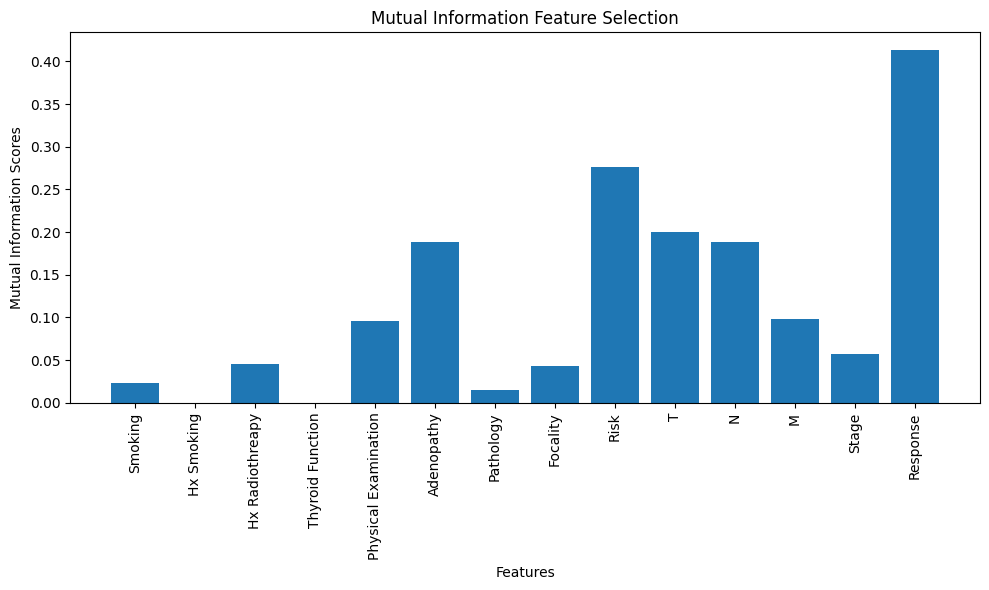

Selected Features:
Index(['Adenopathy', 'Risk', 'T', 'N', 'Response'], dtype='object')


In [ ]:
#mutual information
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.feature_selection import SelectKBest, mutual_info_regression

df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Thyroid_Diff.csv')

df.drop(columns=['Gender','Age'], axis=1, inplace=True)

print('COlumns:', df.columns)

target_column='Recurred'

df.replace(['?', 'NA', 'N/A', 'null', '--'], np.nan, inplace=True)
df.dropna(inplace=True)

X=df.drop(columns=[target_column])
y=df[target_column]

for col in X.columns:
  if X[col].dtype == 'object':
    try:
        X[col] = LabelEncoder().fit_transform(X[col])
    except:
        print(f"Could not encode column:{col}")

X=X.apply(pd.to_numeric, errors='coerce')
X=X.dropna(axis=1)

y=y.astype(str)
y=LabelEncoder().fit_transform(y)

selector=SelectKBest(score_func=mutual_info_regression, k=5)
X_new=selector.fit_transform(X,y)

selected_indices=selector.get_support(indices=True)
selected_features=X.columns[selected_indices]

scores=selector.scores_

plt.figure(figsize=(10,6))
plt.bar(range(len(X.columns)), scores, tick_label=X.columns)
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Mutual Information Scores')
plt.title('Mutual Information Feature Selection')
plt.tight_layout()
plt.show()

print("Selected Features:")
print(selected_features)




Columns: Index(['Smoking', 'Hx Smoking', 'Hx Radiothreapy', 'Thyroid Function',
       'Physical Examination', 'Adenopathy', 'Pathology', 'Focality', 'Risk',
       'T', 'N', 'M', 'Stage', 'Response', 'Recurred'],
      dtype='object')


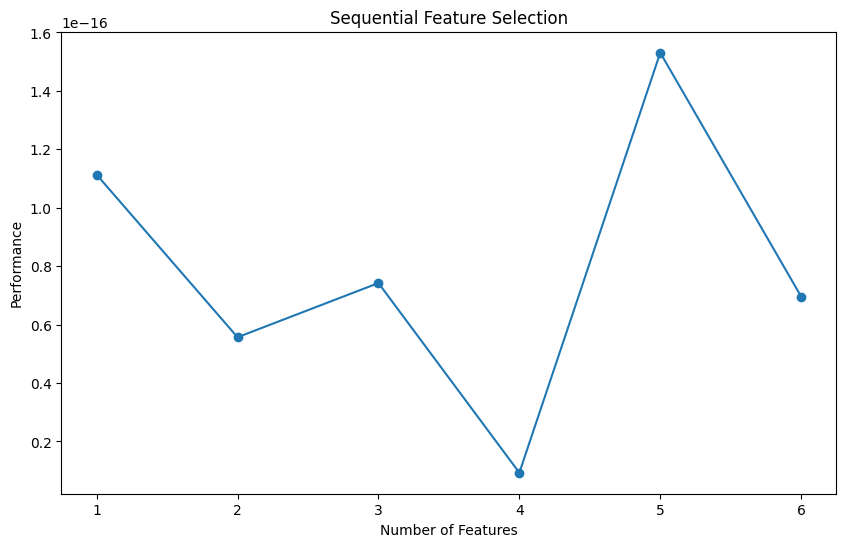

Selected Features:
Index(['Smoking', 'Hx Smoking', 'Pathology', 'Risk', 'Stage', 'Response'], dtype='object')


In [ ]:
#sequential feature selection
import pandas as pd
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LinearRegression

df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Thyroid_Diff.csv')

df.drop(columns=['Gender','Age'], axis=1, inplace=True)

print('Columns:', df.columns)

target_column='Recurred'

df.replace(['NA', '?', 'N/A', 'null', '--'], np.nan, inplace=True)
df.dropna(inplace=True)

X=df.drop(columns=[target_column])
y=df[target_column]

for col in X.columns:
  if X[col].dtype == 'object':
    try:
        X[col] = LabelEncoder().fit_transform(X[col])
    except:
        print(f"Could not encode column:{col}")

X=X.apply(pd.to_numeric, errors='coerce')
X=X.dropna(axis=1)

y=y.astype(str)
y=LabelEncoder().fit_transform(y)

estimator=LinearRegression()
selector=SequentialFeatureSelector(estimator, n_features_to_select=6, direction='forward')
selector.fit(X,y)

selected_indices=np.where(selector.support_)[0]
selected_features=X.columns[selected_indices]

performance=[]

for step in range(1, len(selected_indices) + 1):
  subset_indices=selected_indices[:step]
  X_subset=X.iloc[:, subset_indices]
  score=np.mean(np.abs(np.mean(LinearRegression().fit(X_subset,y).predict(X_subset) - y)))
  performance.append(score)

plt.figure(figsize=(10,6))
plt.plot(range(1, len(selected_indices) + 1), performance, marker='o')
plt.xlabel('Number of Features')
plt.ylabel('Performance')
plt.title('Sequential Feature Selection')
plt.show()

print("Selected Features:")
print(selected_features)

